In [65]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.layers import Input, Dense
from keras.models import Model
import csv
import matplotlib.pyplot as plt
from keras.optimizers import Adam

In [66]:
csv_file_path = 'eps_all.csv'
with open(csv_file_path, 'r', newline='', encoding='utf-8') as file:
    # 使用csv.reader讀取文件內容
    csv_reader = csv.reader(file)
    data = []

    # 迭代每一行
    for row in csv_reader:
        # row是一個列表，包含CSV文件中的一行數據
        data.append(row)
raw_data = data[1:]
count_list = [int(data[1]) for data in raw_data]

print(count_list)

[6844, 24, 24310, 11, 246, 951, 7553, 129, 399, 24, 65, 252, 908, 332, 1, 6682, 54, 26209, 8, 247, 860, 7376, 154, 412, 9, 49, 248, 919, 325, 6673, 15, 23022, 9, 243, 809, 7382, 108, 390, 9, 33, 253, 967, 332, 6670, 15, 23423, 7, 246, 819, 7382, 123, 384, 16, 62, 248, 969, 344, 6670, 54, 20942, 9, 243, 810, 7429, 210, 402, 9, 75, 248, 910, 339, 6668, 21, 23094, 3, 244, 822, 7379, 147, 382, 9, 35, 248, 919, 330, 6823, 24, 26843, 11, 1, 255, 928, 7525, 123, 400, 17, 36, 254, 954, 331, 4, 6670, 18, 22772, 11, 245, 797, 7364, 106, 382, 9, 43, 248, 950, 332, 1, 1, 6675, 15, 21956, 13, 256, 812, 7363, 106, 382, 9, 45, 1, 1, 248, 1, 910, 324, 1, 6666, 15, 17459, 8, 245, 780, 7370, 100, 382, 11, 53, 248, 914, 338, 6658, 15, 17861, 6, 246, 808, 7355, 106, 384, 9, 114, 248, 971, 328, 6674, 55, 15748, 6, 243, 800, 7373, 103, 384, 9, 132, 248, 983, 345, 6803, 21, 17773, 9, 244, 974, 7518, 103, 390, 14, 148, 250, 918, 322, 6659, 21, 18938, 2, 247, 777, 7361, 109, 382, 9, 114, 248, 1026, 323, 4, 5, 

In [54]:
max_count = max(count_list)
min_count = min(count_list)
max_value = 0.8
min_value = 0.2
print(max_count)
print(min_count)
df = pd.read_csv(csv_file_path, parse_dates=['create_time'])

# Sort the DataFrame by timestamp if it's not already sorted
df = df.sort_values(by='create_time')

# Calculate Message Count, 10 Hours Moving Average, 20 Hours Moving Average, and 10 Days Standard Deviation
df['MA_10'] = df['count'].rolling(window=10).mean()
df['MA_20'] = df['count'].rolling(window=20).mean()
df['STD'] = df['count'].rolling(window=10).std()

df['count'] = min_value+(max_value-min_value)*(df['count']-min_count)/(max_count-min_count)
df['MA_10'] = min_value+(max_value-min_value)*(df['MA_10']-min_count)/(max_count-min_count)
df['MA_20'] = min_value+(max_value-min_value)*(df['MA_20']-min_count)/(max_count-min_count)

std_max = df['STD'].max()
std_min = df['STD'].min()

df['STD'] = min_value+(max_value-min_value)*(df['STD']-std_min)/(std_max-std_min)


# Print the resulting DataFrame
print(df)

data = df[['count','MA_10','MA_20','STD']].dropna().to_numpy()
print(data)

99932156
9528
                ip     count         create_time     MA_10     MA_20       STD
0     192.168.61.1  0.200080 2023-01-19 00:00:00       NaN       NaN       NaN
1     192.168.61.1  0.200078 2023-01-19 01:00:00       NaN       NaN       NaN
2     192.168.61.1  0.200141 2023-01-19 02:00:00       NaN       NaN       NaN
3     192.168.61.1  0.200067 2023-01-19 03:00:00       NaN       NaN       NaN
4     192.168.61.1  0.200066 2023-01-19 04:00:00       NaN       NaN       NaN
...            ...       ...                 ...       ...       ...       ...
8462  192.168.61.1  0.200231 2024-01-19 10:00:00  0.200171  0.200226  0.200090
8463  192.168.61.1  0.200235 2024-01-19 11:00:00  0.200177  0.200225  0.200101
8464  192.168.61.1  0.200174 2024-01-19 12:00:00  0.200181  0.200181  0.200096
8465  192.168.61.1  0.200177 2024-01-19 13:00:00  0.200182  0.200179  0.200095
8466  192.168.61.1  0.200211 2024-01-19 14:00:00  0.200190  0.200180  0.200089

[8467 rows x 6 columns]
[[0.20008354 

In [37]:
max_count = max(count_list)
min_count = min(count_list)
max_value = 0.8
min_value = 0.2
print(max_count)
print(min_count)
count_list = [(min_value+(max_value-min_value)*(count-min_count)/(max_count-min_count)) for count in count_list]
print(count_list)

window_size = 10
data = []
for i in range(len(count_list)-window_size+1):
    temp = count_list[i:i+window_size]
    data.append(temp)

0.8
0.2
[0.2000799938928748, 0.20007848672675024, 0.2001407489002391, 0.20006720399707664, 0.2000655046822828, 0.20007372504253992, 0.20009645863197273, 0.200087295542307, 0.2001288476920363, 0.20015628291922027, 0.20017453103815486, 0.20014938358106435, 0.20013597520673695, 0.20016976935394454, 0.20016583631087045, 0.20013747636821563, 0.20008583040870384, 0.2000771176674817, 0.2000834765875053, 0.20008353663396444, 0.20007110101227524, 0.20007193565805736, 0.20006183584362894, 0.2000493942172938, 0.20017962898253638, 0.20008330845741967, 0.20007276429919357, 0.2000824918255753, 0.2000913126504239, 0.20008950525200359, 0.20011174646047142, 0.2000769975745634, 0.20008287011826792, 0.20010047574008963, 0.20011200466024573, 0.20009817596070434, 0.2000974614078405, 0.20009695101293773, 0.20009350434618273, 0.20009224937518658, 0.20009773762155256, 0.2000927477607975, 0.2000928378304862, 0.20009788773770043, 0.2000913546829453, 0.2000795495490771, 0.20008350661073487, 0.20008090059440792, 

In [5]:
scaler = StandardScaler()
count_list = scaler.fit_transform(count_list)
window_size = 20
data = []
for i in range(len(count_list)-window_size+1):
    temp = count_list[i:i+window_size]
    data.append(temp)

#print(data)

In [55]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))

In [26]:
X_test

array([[0.20005113, 0.20004775, 0.20007303, 0.2000717 , 0.20006943],
       [0.20115569, 0.20116684, 0.20119704, 0.20121033, 0.2011981 ],
       [0.20014365, 0.20014107, 0.20012369, 0.20012494, 0.20010973],
       ...,
       [0.20018875, 0.20010336, 0.20011115, 0.20008377, 0.20009022],
       [0.20019276, 0.20017708, 0.20021138, 0.20015866, 0.20014679],
       [0.20004203, 0.20003016, 0.2000408 , 0.2000324 , 0.20002703]])

In [56]:
# Define the architecture of the autoencoder
input_dim = X_train.shape[1]  # Number of features
encoding_dim = 32  # Choose a suitable encoding dimension (can be adjusted)
epochs = 100
batch_size = 64

# Encoder part
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)


# Decoder part
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Create the autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
optimizer = Adam(lr=0.001)  # You can adjust the learning rate
autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')

# Print the model summary
autoencoder.summary()

# Train the autoencoder
epochs = 500
batch_size = 32
autoencoder.fit(X_train, X_train, epochs=epochs, batch_size=batch_size, shuffle=True, validation_data=(X_test, X_test))

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_24 (Dense)            (None, 128)               640       
                                                                 
 dense_25 (Dense)            (None, 32)                4128      
                                                                 
 dense_26 (Dense)            (None, 128)               4224      
                                                                 
 dense_27 (Dense)            (None, 4)                 516       
                                                                 
Total params: 9508 (37.14 KB)
Trainable params: 9508 (37.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
212/212 [====

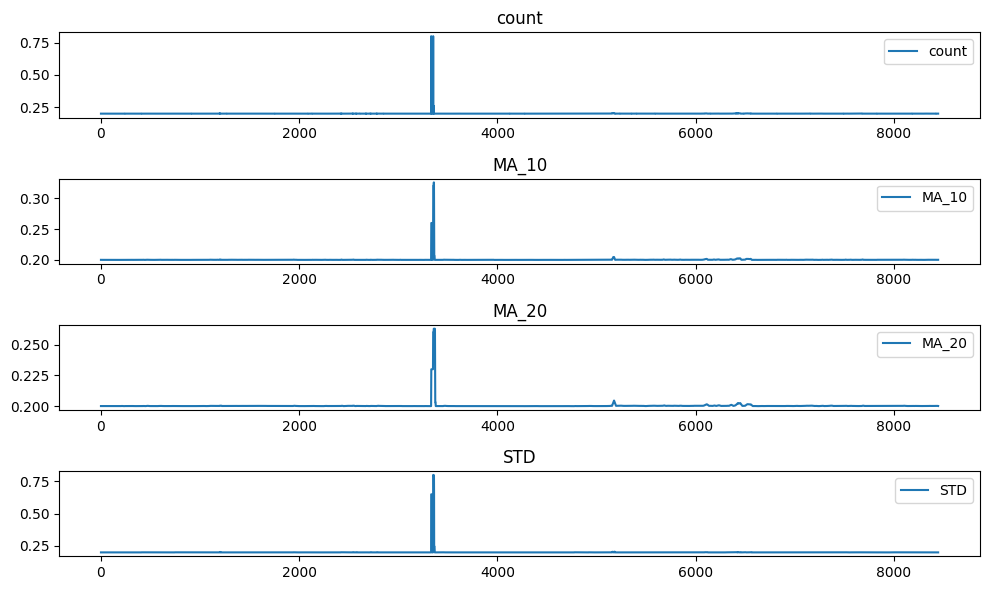

In [59]:
plt.figure(figsize=(10, 6))

num_features = data.shape[1]
selected_columns = ['count', 'MA_10', 'MA_20', 'STD']

for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    plt.plot(data[:, i], label=f'{selected_columns[i]}')
    plt.title(f'{selected_columns[i]}')
    plt.legend()

plt.tight_layout()
plt.show()

 1/53 [..............................] - ETA: 0s

53/53 [==============================] - 0s 1ms/step
Number of anomalies detected: 17
Indices of anomalous samples: [  25   39   67  210  318  329  351  559  632  869  982 1012 1077 1082
 1209 1275 1515]


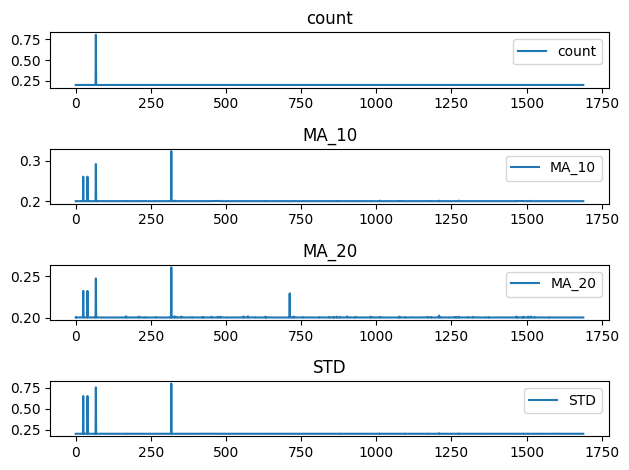

In [64]:
reconstructed_data = autoencoder.predict(X_test)
# Calculate mean squared error (MSE) for each sample
mse = np.mean(np.power(X_test - reconstructed_data, 2), axis=1)

# Set a threshold for anomaly detection (adjust as needed)
threshold = np.percentile(mse, 99)  # You can experiment with different percentiles

# Identify anomalies based on the threshold
anomalies = X_test[mse > threshold]

# Print the number of anomalies found
print(f"Number of anomalies detected: {len(anomalies)}")

# Optionally, you can further investigate the anomalies and their patterns
# For example, print the indices of the anomalous samples
print("Indices of anomalous samples:", np.where(mse > threshold)[0])

selected_columns = ['count', 'MA_10', 'MA_20', 'STD']

for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    plt.plot(reconstructed_data[:, i], label=f'{selected_columns[i]}')
    plt.title(f'{selected_columns[i]}')
    plt.legend()

plt.tight_layout()
plt.show()

In [44]:
# Train the Isolation Forest model
clf = IsolationForest(contamination='auto', random_state=42)  # Adjust contamination based on your dataset
clf.fit(X_train)


IsolationForest(random_state=42)

In [40]:
reconstructions = autoencoder.predict(X_test)
# Calculate mean squared error (MSE) for each sample
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

# Set a threshold for anomaly detection (adjust as needed)
threshold = np.percentile(mse, 99)  # You can experiment with different percentiles

# Identify anomalies based on the threshold
anomalies = X_test[mse > threshold]

# Print the number of anomalies found
print(f"Number of anomalies detected: {len(anomalies)}")

# Optionally, you can further investigate the anomalies and their patterns
# For example, print the indices of the anomalous samples
print("Indices of anomalous samples:", np.where(mse > threshold)[0])

53/53 [==============================] - 0s 748us/step
Number of anomalies detected: 17
Indices of anomalous samples: [  38  122  160  299  331  582  728  861  919  921 1059 1105 1169 1179
 1469 1499 1624]


In [25]:
# Predict anomalies (1 for normal, -1 for anomalies)
predictions = clf.predict(X_test)
print(predictions)
print(len(X_test))

# Extract anomalies from the test data
anomalies = X_test[predictions == -1]
print(len(anomalies))

#for i in np.where(mse > threshold)[0]:
for i in X_test[predictions == -1]:


    plt.figure(figsize=(10, 4))
    
    # Plot original data
    plt.subplot(2, 1, 1)
    plt.plot(i, label='Original Data', color='blue')
    plt.title('Original Data')
    
    plt.tight_layout()
    plt.show()

NameError: name 'clf' is not defined

[0.20007131 0.2600902  0.23007894 0.64997205]
1/1 [==============================] - 0s 22ms/step


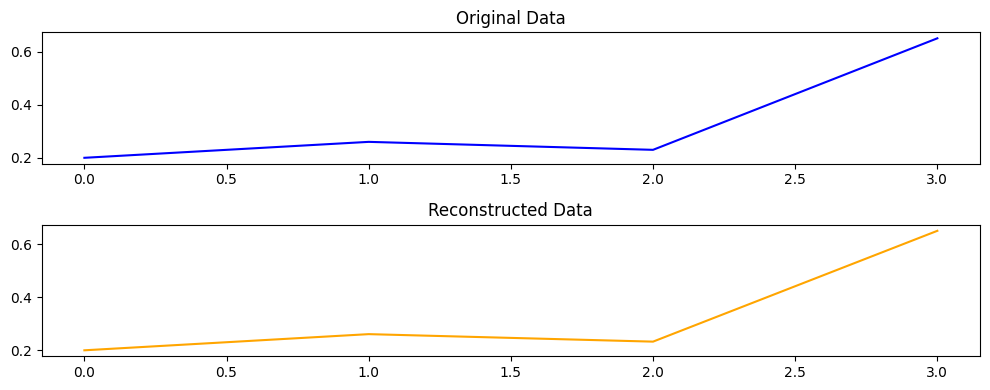

[0.20007072 0.26007599 0.23008325 0.6499839 ]
1/1 [==============================] - 0s 18ms/step


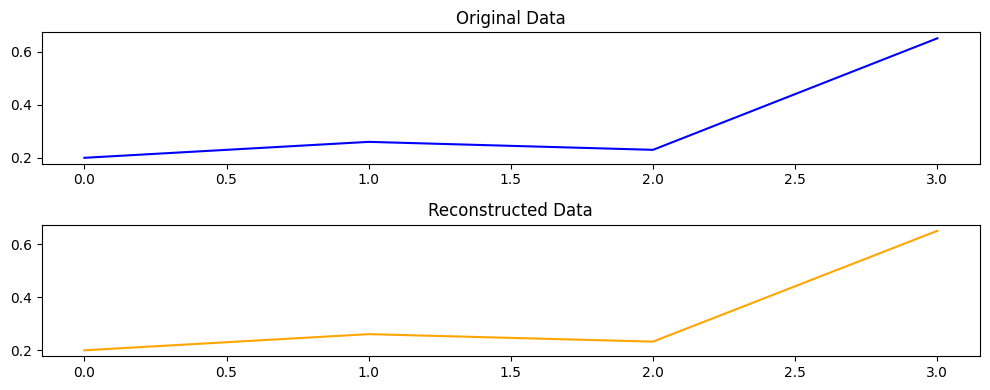

[0.8        0.32007088 0.26007764 0.8       ]
1/1 [==============================] - 0s 18ms/step


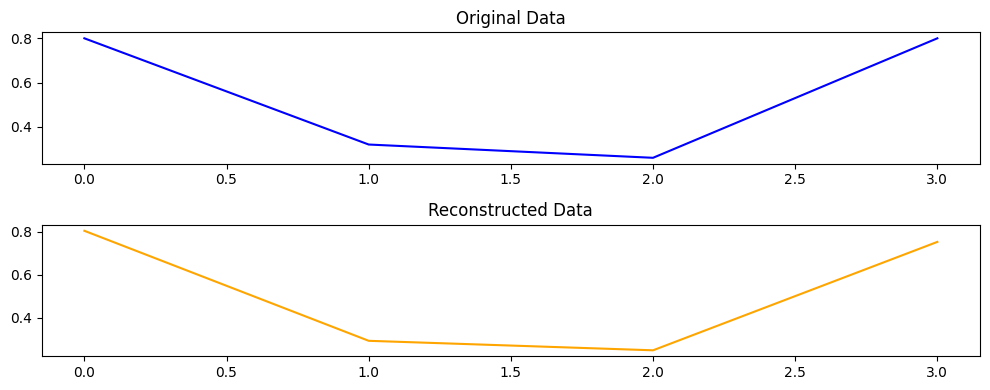

[0.20264365 0.20252622 0.2022738  0.20015974]
1/1 [==============================] - 0s 19ms/step


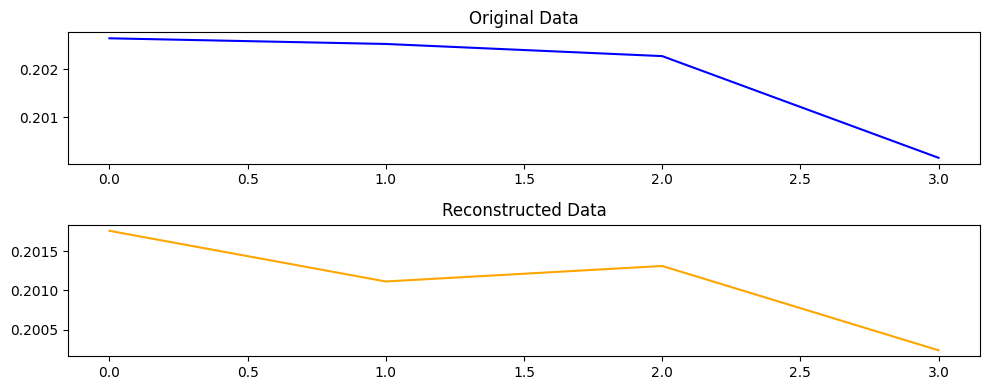

[0.20013587 0.32009158 0.26008152 0.79997412]
1/1 [==============================] - 0s 19ms/step


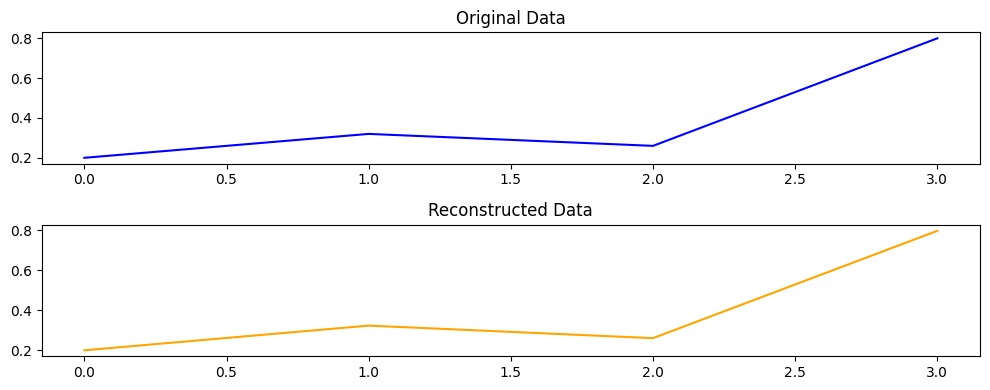

[0.20486112 0.20470627 0.20329142 0.20037535]
1/1 [==============================] - 0s 16ms/step


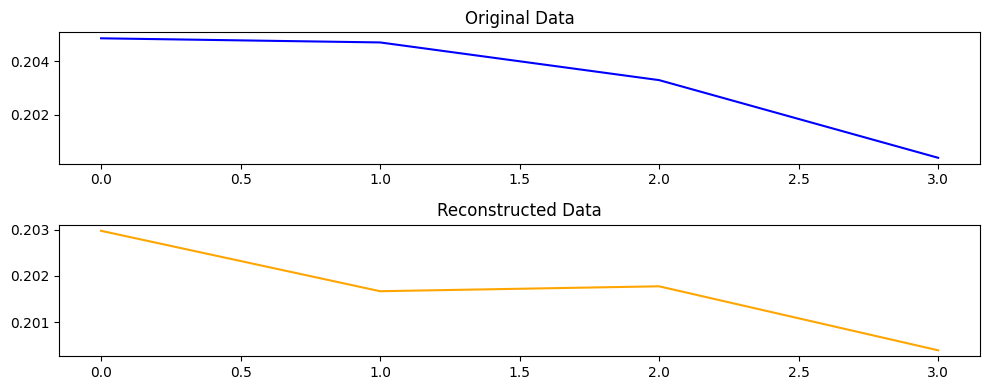

[0.20248762 0.20244623 0.20227657 0.20154104]
1/1 [==============================] - 0s 19ms/step


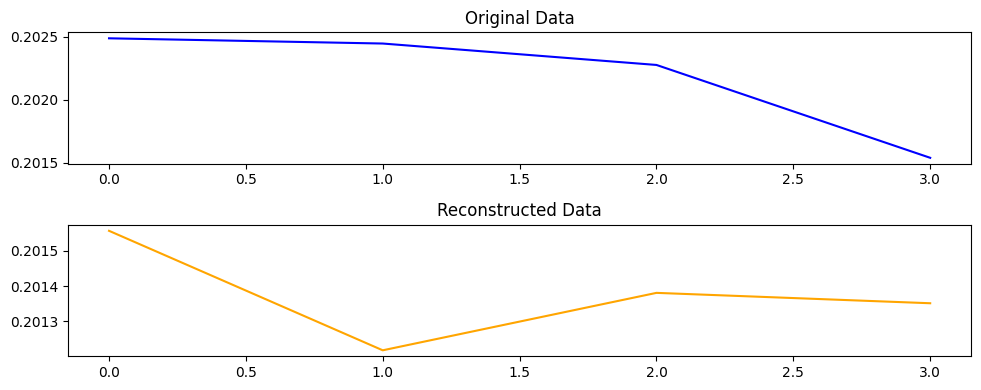

[0.20115061 0.20238161 0.20243662 0.20116255]
1/1 [==============================] - 0s 17ms/step


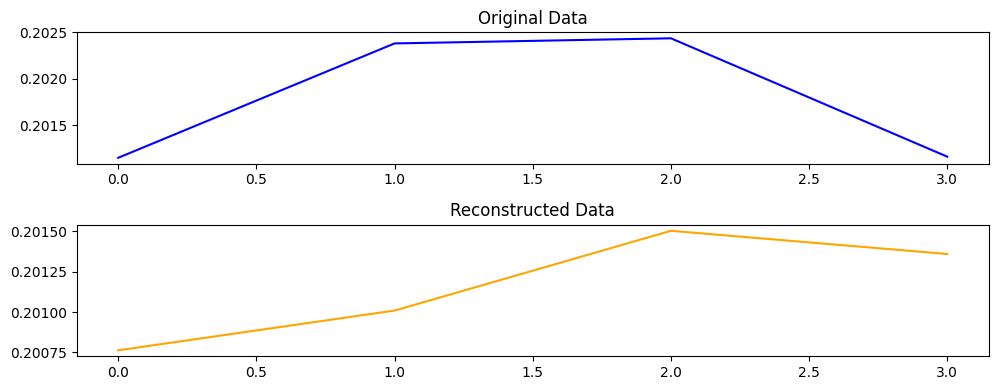

[0.20253774 0.20250959 0.20225555 0.20012024]
1/1 [==============================] - 0s 16ms/step


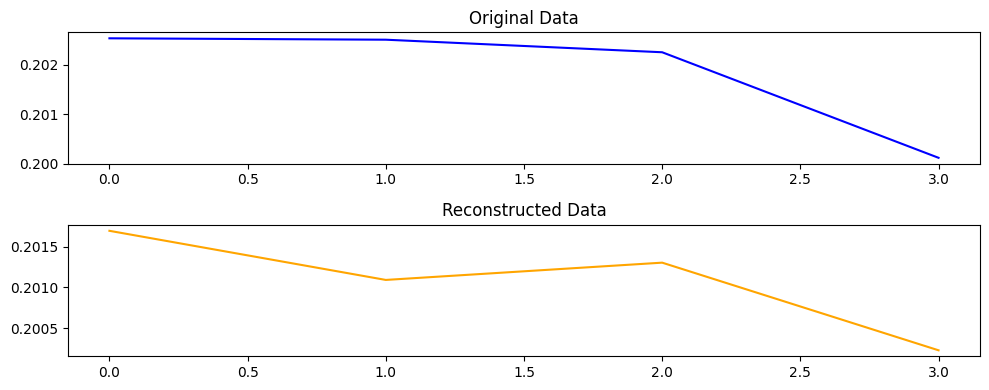

[0.20252493 0.20249163 0.2022695  0.20036264]
1/1 [==============================] - 0s 14ms/step


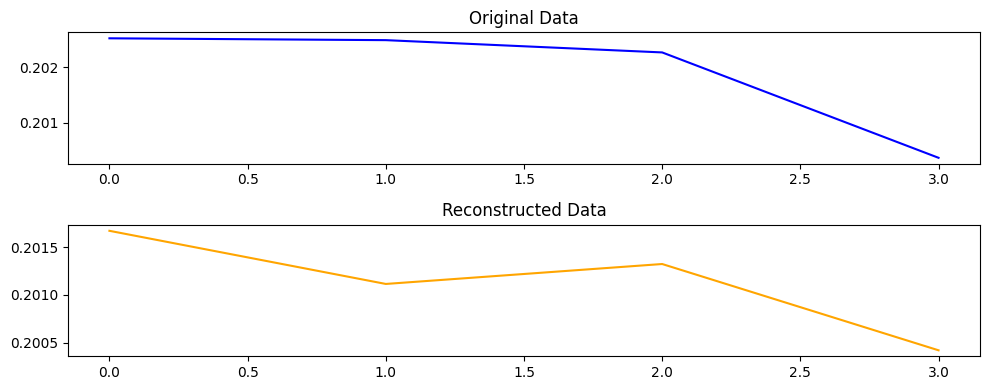

In [62]:


for i in np.where(mse > threshold)[0][:10]:
#for i in range(220, 240):
    print(X_test[i])

    plt.figure(figsize=(10, 4))
    
    # Plot original data
    plt.subplot(2, 1, 1)
    plt.plot(X_test[i], label='Original Data', color='blue')
    plt.title('Original Data')
    
    # Plot reconstructed data
    plt.subplot(2, 1, 2)
    reconstructed_sample = autoencoder.predict(np.expand_dims(X_test[i], axis=0))
    plt.plot(reconstructed_sample.flatten(), label='Reconstructed Data', color='orange')
    plt.title('Reconstructed Data')
    
    plt.tight_layout()
    plt.show()

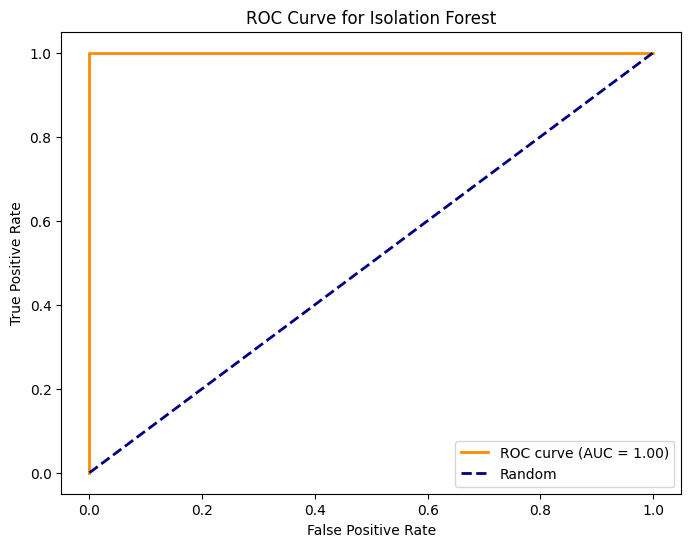

In [53]:
from sklearn.metrics import roc_curve, auc

# Generate anomaly scores for test data
anomaly_scores = clf.decision_function(X_test)

# Create true labels (1 for normal, -1 for anomalies)
true_labels = np.ones(len(X_test))
true_labels[predictions == -1] = -1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, anomaly_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Isolation Forest')
plt.legend(loc='lower right')
plt.show()